In [1]:
from astroquery.skyview import SkyView
from astroquery.mast import Observations
from astroquery.vizier import Vizier
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import cv2
import numpy as np
from astropy.io import fits
import os
import pandas as pd
import requests
import json

In [2]:
# # List available surveys
# surveys = SkyView.list_surveys()
# print(surveys)

In [3]:
# Define the coordinates for the Eagle Nebula Pillars of Creation
coords = SkyCoord('18h18m48s -13d49m00s', frame='icrs')
# Track the name of the object
object_name = 'Eagle Nebula Pillars of Creation'

In [4]:
# # Define the coordinates for the M87 Black Hole
# coords = SkyCoord('12h30m49.42338s +12°23m28.0439s', frame='icrs')
# # Track the name of the object
# object_name = 'M87 Black Hole'

In [5]:
# # Define the coordinates for the Crab Nebula
# coords = SkyCoord('05h34m31.94s +22d00m52.2s', frame='icrs')
# # Track the name of the object
# object_name = 'Crab Nebula'

In [6]:
# # Define the coordinates for the Orion Nebula
# coords = SkyCoord('05h35m17.3s -05d23m28s', frame='icrs')
# # Track the name of the object
# object_name = 'Orion Nebula'

In [7]:
# Fetch an image from SkyView
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=0.1 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=0.5 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=1 * u.deg)

image_list = SkyView.get_images(position=coords, survey=['DSS1 Blue'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS1 Red'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS2 Red'], radius=0.25 * u.deg)

image_hdu = image_list[0][0]
image = image_list[0][0].data

In [8]:
# Create a folder for the object with the name of the object with underscores instead of spaces
object_name = object_name.replace(' ', '_')
os.makedirs(f'images/{object_name}', exist_ok=True)

In [9]:
# # Save the image as a FITS file
# fits_file_path = f'images/{object_name}/{object_name}.fits'
# hdu = fits.PrimaryHDU(image)
# hdul = fits.HDUList([hdu])
# hdul.writeto(fits_file_path, overwrite=True)

In [10]:
# # Display the image
# plt.imshow(image, cmap='gray')

In [11]:
# # Download the image in all available color maps to the object folder
# for cmap in plt.colormaps():
#     plt.imsave(f'images/{object_name}/{object_name}_{cmap}.png', image, cmap=cmap)

In [12]:
# # Visualize al color maps in a single image
# fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# for i, cmap in enumerate(plt.colormaps()):
#     ax.imshow(image, cmap=cmap)
#     ax.set_title(cmap)
#     plt.axis('off')
#     plt.savefig(f'images/{object_name}/All_cmaps__{object_name}.png')

In [ ]:
image_hdu.header

In [ ]:
# Extract WCS information
wcs = WCS(image_hdu.header)

# Display the image with WCS projection and grid
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(image_hdu.data, cmap='gray', origin='lower')
ax.set_title(f'{object_name}')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='dotted')


# # Display the image without WCS projection
# plt.imshow(image, cmap='gray')
# plt.title('Sky Image')
# plt.xlabel('RA')
# plt.ylabel('Dec')
# plt.show()

In [ ]:
# Display the image with WCS projection and grid
fig = plt.figure(figsize=(14, 14), dpi=600)
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(image_hdu.data, cmap='twilight_shifted_r', origin='lower')
ax.set_title(f'{object_name}')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='dotted')

In [ ]:
# Fetch star data from Vizier using the 2MASS catalog
v = Vizier(columns=['*'])
v.ROW_LIMIT = -1
catalog_list = v.query_region(coords, radius=0.3 * u.deg, catalog='II/246')
catalog = catalog_list[0]

# Convert the table to a pandas DataFrame for easier manipulation
catalog = catalog.to_pandas()
print(catalog)

# Save the catalog as a CSV file
catalog.to_csv(f'images/{object_name}/2MASS_catalog_{object_name}.csv', index=False)

In [125]:
# Finding the pixel coordinates of a star in the image

from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

# Extract WCS information from image
wcs = WCS(image_hdu.header)

print('*' * 10)

print("Testing with manually translated coordinates: ")
# 18184798-1354388 = 18h18m47.98s -13d54m38.8s
# c = SkyCoord("18h18m47.98s -13d54m38.8s", frame=ICRS)

# 18184744-1354414 = 18h18m47s -13d54m41s
# c = SkyCoord("18h18m47.44s -13d54m41.4s", frame=ICRS)

# 18190221-1353284 = 18h19m02.21s -13d53m28.4s
c = SkyCoord("18h19m02.21s -13d53m28.4s", frame=ICRS)

test_pixel_coords = wcs.world_to_pixel(c)
print('Pixel Coords:', pixel_coords)

# Function that takes a wcs object and returns an array of the range of ICRS coordinates in the image
def getCoordRangeFromPixels(wcs):

    x_dim = wcs.pixel_shape[0] # May need to swap x and y dim! (but I think it's right...)
    y_dim = wcs.pixel_shape[1]

    coord_range = {}

    coord_range['lower_left'] = wcs.all_pix2world([0], [0], 1)
    coord_range['lower_right'] = wcs.all_pix2world([x_dim], [0], 1)
    coord_range['upper_left'] = wcs.all_pix2world([0], [y_dim], 1)
    coord_range['upper_right'] = wcs.all_pix2world([x_dim], [y_dim], 1)
    
    return coord_range


range = getCoordRangeFromPixels(wcs)
print('RANGE:', range)

print('*' * 10)

# NOTE: X Max and min are reversed for some reason.. orientation of image in coord system...?

x_max = range['lower_left'][0]
x_min = range['lower_right'][0]

y_min = range['lower_left'][1]
y_max = range['upper_left'][1]


def getStarsInImage(wcs, catalog):

    stars_in_image = []

    print("Number of stars in catalog query: ", len(catalog))
    
    for star in catalog.iterrows(): 

        # print('STAR:\n', star[1][0]) # REJ2000
        # print('STAR:\n', star[1][1]) # DEJ2000

        rej = star[1][0]
        dej = star[1][1]

        if rej < x_max and rej > x_min: 

            # print('Star is in x-coords')

            if dej < y_max and dej > y_min: 

                # Then star is within bounds of image! Add it to a list of stars in the image
                # print('Star is in y-coords')

                stars_in_image.append(star)


    return stars_in_image


stars_in_image = getStarsInImage(wcs, catalog)
# print("Stars in image: ", stars_in_image)
print("Number of cataloged stars in image: ", len(stars_in_image))

# print(300 **2)

print('*' * 15)


# Get a star from the catalog and convert is coords to pixel coords
def getPixelCoordsFromStar(star):

    star_coords = star[1]['_2MASS']

    def parseStarCoords(coords):

        if '-' in coords:

            rej, dej = coords.split('-')
            rej = rej[0:2] + 'h' + rej[2:4] + 'm' + rej[4:6] + '.' + rej[6:] + 's'
            dej = '-' + dej[0:2] + 'd' + dej[2:4] + 'm' + dej[4:6] + '.' + dej[6:] + 's'

        elif '+' in coords:

            rej, dej = coords.split('+')
            rej = rej[0:2] + 'h' + rej[2:4] + 'm' + rej[4:6] + '.' + rej[6:] + 's'
            dej = '+' + dej[0:2] + 'd' + dej[2:4] + 'm' + dej[4:6] + '.' + dej[6:] + 's'

        # print('COORDS:', rej + ' ' + dej)

        return rej + dej
    
    coords = parseStarCoords(star_coords)

    # c = SkyCoord("18h19m02.21s -13d53m28.4s", frame=ICRS)
    c = SkyCoord(coords, frame=ICRS)

    pixel_coords = wcs.world_to_pixel(c)
    # print('Pixel Coords:', pixel_coords)
    return pixel_coords

pixel_coords = getPixelCoordsFromStar(stars_in_image[1])


**********
Testing with manually translated coordinates: 
Pixel Coords: (array(264.4904396), array(232.79345245))
RANGE: {'lower_left': [array([274.95858419]), array([-14.06739415])], 'lower_right': [array([274.44313395]), array([-14.06739597])], 'upper_left': [array([274.95802983]), array([-13.56740241])], 'upper_right': [array([274.44368464]), array([-13.56740416])]}
**********
Number of stars in catalog query:  28019


C:\Users\shoulau\AppData\Local\Temp\ipykernel_16008\3211053498.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rej = star[1][0]
C:\Users\shoulau\AppData\Local\Temp\ipykernel_16008\3211053498.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dej = star[1][1]


Number of cataloged stars in image:  23723
***************


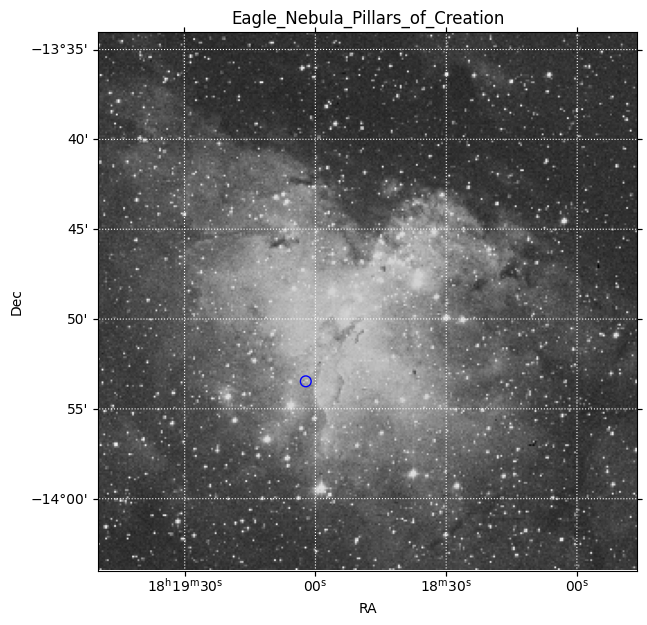

In [126]:
# Display the image with the location of the star above circled

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection=wcs)

Drawing_colored_circle = plt.Circle(( test_pixel_coords[0] , test_pixel_coords[1] ), 3, fill=False, edgecolor='Blue')
ax.add_artist( Drawing_colored_circle )
ax.imshow(image_hdu.data, cmap='gray', origin='lower')
ax.set_title(f'{object_name}')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='dotted')

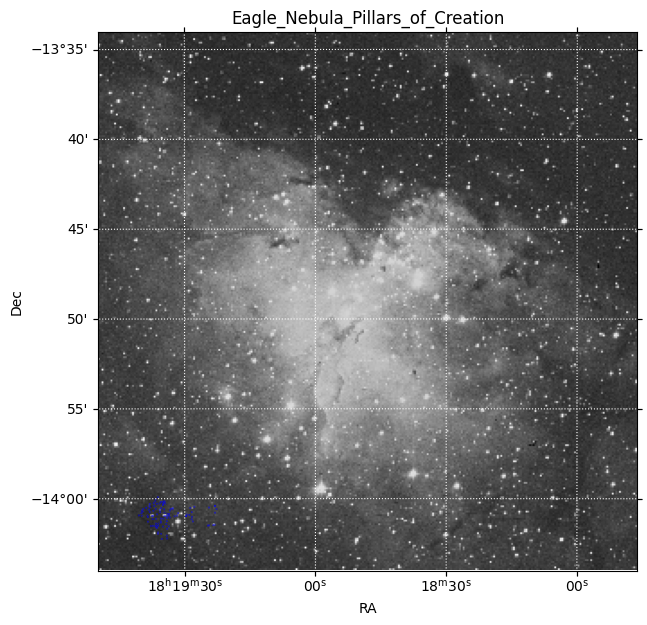

In [128]:
# Display the image with the location of the star above circled

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection=wcs)

for star in stars_in_image[800:900]: 

    pixel_coords = getPixelCoordsFromStar(star)
    # print('PIXEL COORDS: ', pixel_coords)

    Drawing_colored_circle = plt.Circle(( pixel_coords[0] , pixel_coords[1] ), 0.1, fill=False, edgecolor='Blue')
    ax.add_artist( Drawing_colored_circle )
    ax.set_title(f'{object_name}')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

ax.imshow(image_hdu.data, cmap='gray', origin='lower')

In [19]:
# # Fetch star data from Vizier using the Hipparcos catalog
# v = Vizier(columns=['*'])
# catalog_list = v.query_region(coords, radius=2 * u.deg, catalog='I/239/hip_main')
# catalog = catalog_list[0]

# # Convert the table to a pandas DataFrame for easier manipulation
# catalog = catalog.to_pandas()
# print(catalog)

# # Save the catalog as a CSV file
# catalog.to_csv(f'images/{object_name}/Hipparcos_catalog_{object_name}.csv', index=False)

In [39]:
# # Example preprocessing steps
# # Normalize the image
# normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))

In [40]:
# # Extract star positions and magnitudes
# star_positions = np.array([stars['RAJ2000'], stars['DEJ2000']]).T
# star_magnitudes = stars['Vmag']

In [41]:
# # Save preprocessed data for further analysis
# np.save('preprocessed_image.npy', normalized_image)
# star_data = pd.DataFrame({'RA': stars['RAJ2000'], 'Dec': stars['DEJ2000'], 'Magnitude': stars['Vmag']})
# star_data.to_csv('preprocessed_star_data.csv', index=False)

In [42]:
# # Save the image using OpenCV
# cv2.imwrite('sky_image.png', image)